In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv ('Crop_recommendation.csv')

In [75]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [76]:
#crops present in the given data
print(df.label.unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [77]:
#check for null values
df.isnull().values.any()

False

In [78]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [79]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


# Data Visuallization
    B/W Ph of the soil and the crop grown

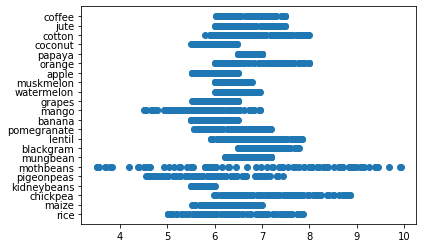

In [80]:
plt.scatter(df.ph,df.label)

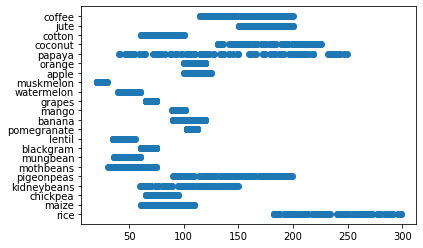

In [81]:
plt.scatter(df.rainfall,df.label)

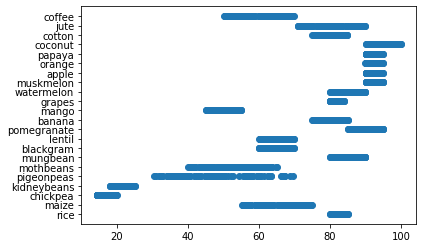

In [82]:
plt.scatter(df.humidity,df.label)

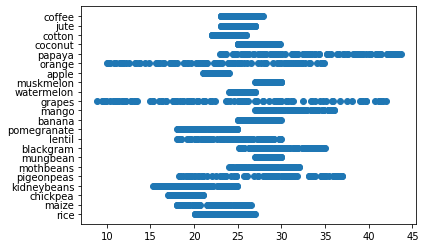

In [83]:
plt.scatter(df.temperature,df.label)

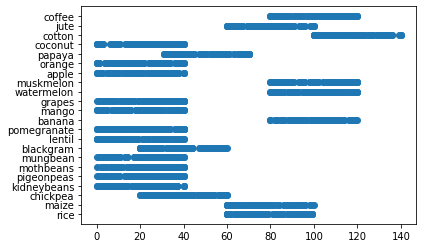

In [84]:
plt.scatter(df.N,df.label)

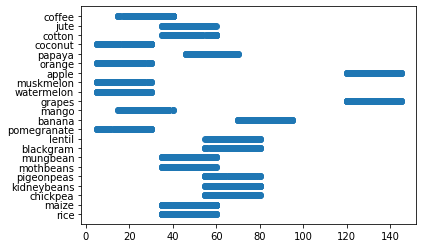

In [85]:
plt.scatter(df.P,df.label)

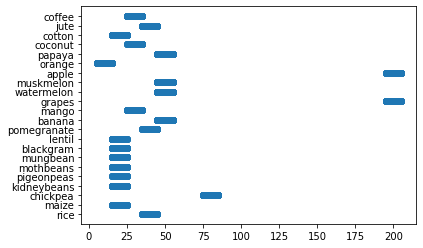

In [86]:
plt.scatter(df.K,df.label)

# Prediction

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder()

In [89]:
df['label'] = le.fit_transform(df['label'])

In [90]:
print(df)

        N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536     20
1      85  58  41    21.770462  80.319644  7.038096  226.655537     20
2      60  55  44    23.004459  82.320763  7.840207  263.964248     20
3      74  35  40    26.491096  80.158363  6.980401  242.864034     20
4      78  42  42    20.130175  81.604873  7.628473  262.717340     20
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507      5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610      5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839      5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293      5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041      5

[2200 rows x 8 columns]


In [480]:
X = df[['N', 'P', 'K','temperature','humidity','ph','rainfall']]
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
predicted_details = lm.predict(X_test)
predicted_details

array([10.74190121, 11.66292325, 11.52469014, 13.09536232, 13.31502116,
       10.98375133, 13.40983055,  7.04040832,  9.6322809 , 15.34008998,
       10.19424513, 11.39232675, 14.63810517, 12.88165825, 10.67324588,
        9.30490515,  4.7883965 ,  8.26980954, 14.30841329,  4.13260715,
       17.50286873,  8.98429996,  3.05357091, 11.20113915, 12.00424955,
       10.51329553, 14.54579639,  9.6784845 , 13.2049912 ,  9.93477528,
       16.33758047,  5.48882791,  8.16874404, 16.38282798,  9.4020051 ,
       12.07835002, 14.02050343, 16.72220737, 10.85164816, 11.70921539,
       13.78065934, 11.99008744,  6.86390933, 14.90596496,  1.81379184,
       11.61279592,  6.71827268,  8.38567742, 13.17864886, 14.60742752,
       11.12886795,  8.50123643,  4.18567974,  5.33347324, 13.05105054,
       10.29188474,  3.83731575, 10.20031331,  9.59513633,  5.89696543,
       16.32674121,  4.80911598,  9.53898302, 11.33099985, 11.41813292,
       10.47405386,  5.63715628, 14.57994845, 11.17925469, 11.09

In [481]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predicted_details)

0.37029638533665343

In [122]:
from sklearn.svm import SVR

In [124]:
sv=SVR()

In [125]:
sv.fit(X,y)

SVR()

In [126]:
predicted_sv = sv.predict(X_test)
predicted_sv

array([ 1.35847138, 17.45453675, 12.78706943, 15.1004854 , 17.95532738,
        1.33657531,  6.44062302,  9.47213752, -0.07290215, 18.39483145,
       17.88944146,  5.0043926 ,  5.18167305,  6.51072169, 11.77564944,
       11.59501261, 15.88741743,  6.44894544, 18.48646936, 15.22785061,
        8.40293905, 13.02124021,  8.53154485, 15.99220372, 12.92900302,
       11.53172107,  7.49727293,  2.42431588, 15.96069989,  9.14986815,
        3.33110831, 18.15661107, 13.14984533, 14.8121631 , 18.34588913,
       17.5500706 ,  3.41855462, 13.50397916, 14.89394819, 11.17879615,
       16.7462467 ,  8.43688615,  7.52290439,  3.94935274, 16.87076836,
       10.75525736,  8.15880061,  7.19939412, 13.57444145, 17.83454883,
        6.55476144, 18.97459437, 10.23464548,  0.41999318,  9.01349225,
       16.77415808,  6.49921738, 17.6933775 , 12.81967493, 12.90565146,
       15.87437316,  9.07786247, 15.9121533 , 13.13047479, 11.44605519,
       17.71553836,  7.21924435, 12.02445577, 10.81617381, 18.38

In [127]:
explained_variance_score(y_test, predicted_sv)

0.7463172829127376

In [567]:
X = df[['N', 'P', 'K','temperature','humidity','ph','rainfall']]
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,y)
predicted_knn = knn.predict(X_test)
print(predicted_knn)
explained_variance_score(y_test, predicted_knn)

[ 4 13  3  1 15  9  5  3  2 13  5 12  7 20 20 12  4 15 10 14 13  6 14 20
  2 16  5  0  7  1 20  9 12  1 21  3 13  6 20 17 15 19  8 13 12 14 11  1
 19  5 13  8  5  8  7  7  6 18  6 17 12  6 18  3 19  7 21  3 10  7  8 17
 12 16 11 15  0 17 15 16  7 10  9 21 18 14 20 12 14 16 14  1 13  4  6 17
  9 12 16 16  3  9 15 18  2  3 16  8 17 13  4 18 11 21 18  2 17 21 17 12
  4  4 18  7 21 19 19 10 21  5 11 15 17 13  2 13 12  0 11 15  0 12  3 20
  9 10  8  3  3  4  0 12 16  9  7 12 18  9  3  7 10  9 17 16 21 10 11 10
 18  3 18  3 13 16  2  7 18  5 12  8 21  2 21  3 19 21 12 11 11 12 10  7
  1 13  5  8 20  8  1 10 11 13 17  0 19 15 19  8  6 19 11  4 16  1 11  9
  2  8 19  1  0 14  2  5 14  0 13  4  9  7  2 12 14  7  2 17 15  9 17  8
  2 10  6  5 15 15 12  8  0  6  8  6 12  5  2 10  2 17  5  9  3 20  2 15
 13 12 12 13  4 15 11  6 14 18  4 19  2 19 20 13 12 11  7  9  5  1  0  1
 17  2 16 13 11 17  3 20  1 13 19  4  7  5  2  4 10 13  8 16 11  8  7 18
 20 18 20  1 12 12 12 13 18 12 20 18  0  7 21 11 12

0.9385653343588305

In [555]:
X = df[['N', 'P', 'K','temperature','humidity','ph','rainfall']]
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)
predicted_lr = lr.predict(X_test)
print(predicted_lr)
explained_variance_score(y_test, predicted_lr)

[ 4 10 13 18  5  0 15  7 19 11 10  4 18  8 13  5  7 19 12 14  8 18  8 17
  2  1 20  7 21  2 19  8 18 19  0 15  0 21 17 19 16 21  0  1  0  4 21  0
 10 17  8  2  2  0  7  8 21  3 17  0  6  2  8 13 20 13 14 20  8  6  4  9
  9  2 16  9 20  3  4 14 20  1  2 13 16 12 14 21 19 20 16  8 21  5 15  6
 11 16 21  6  9  0  6 20 13 11  4  5 14 11 16 11  6 21 18  5  4  9  8 16
  5  3 15  2 10  6 10  7  4  2  6 17  7 13 16  1 10 15 10  7  6  9 16 15
 21 21  8  4  3  0 11 12  1  7 16 16  8 15 20  4 17  1  2 16  2  0  3 13
  1  9  9 20 10  3 12 14 12 11  8  0 21  4 14 18 19 14 18 13  0  0  4 12
  1 15 10  9 21  4  7  4  4  4 11  0 11  3  1  3  0  4 20 17  2 18 15  1
 19  9  4 17 14  7 14 20 12  4  4 19 15 15 16 10 20 12 17  3  5 20 10 16
 19 19 17 14 13 20  1  3 12 12 10 13 14 12  7 10  8 15 10 11  0  8 21  3
 20  2 19 20  7 19 17  2 14  7  7  7  7  3  1 10 15  4  1  0  9  6  6 10
  1 12  7 19  3  0  8  4  6 19 15 21 19 19  8 20 12 15  2  7  8 12 16 19
  1 20  8 20  0 12 12  7 15  4 18 19 18 11 14  1 16

D:\Software\Python\envs\R-Tutorial\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9131135217191654

In [ ]:
a= (explained_variance_score(y_test, predicted_details))*100
b= (explained_variance_score(y_test, predicted_sv))*100
c= (explained_variance_score(y_test, predicted_knn))*100
d= (explained_variance_score(y_test, predicted_lr))*100
model=['Linear Regression','SVR','KNN','Logistic Regression']
accuracy=[a,b,c,d]